# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
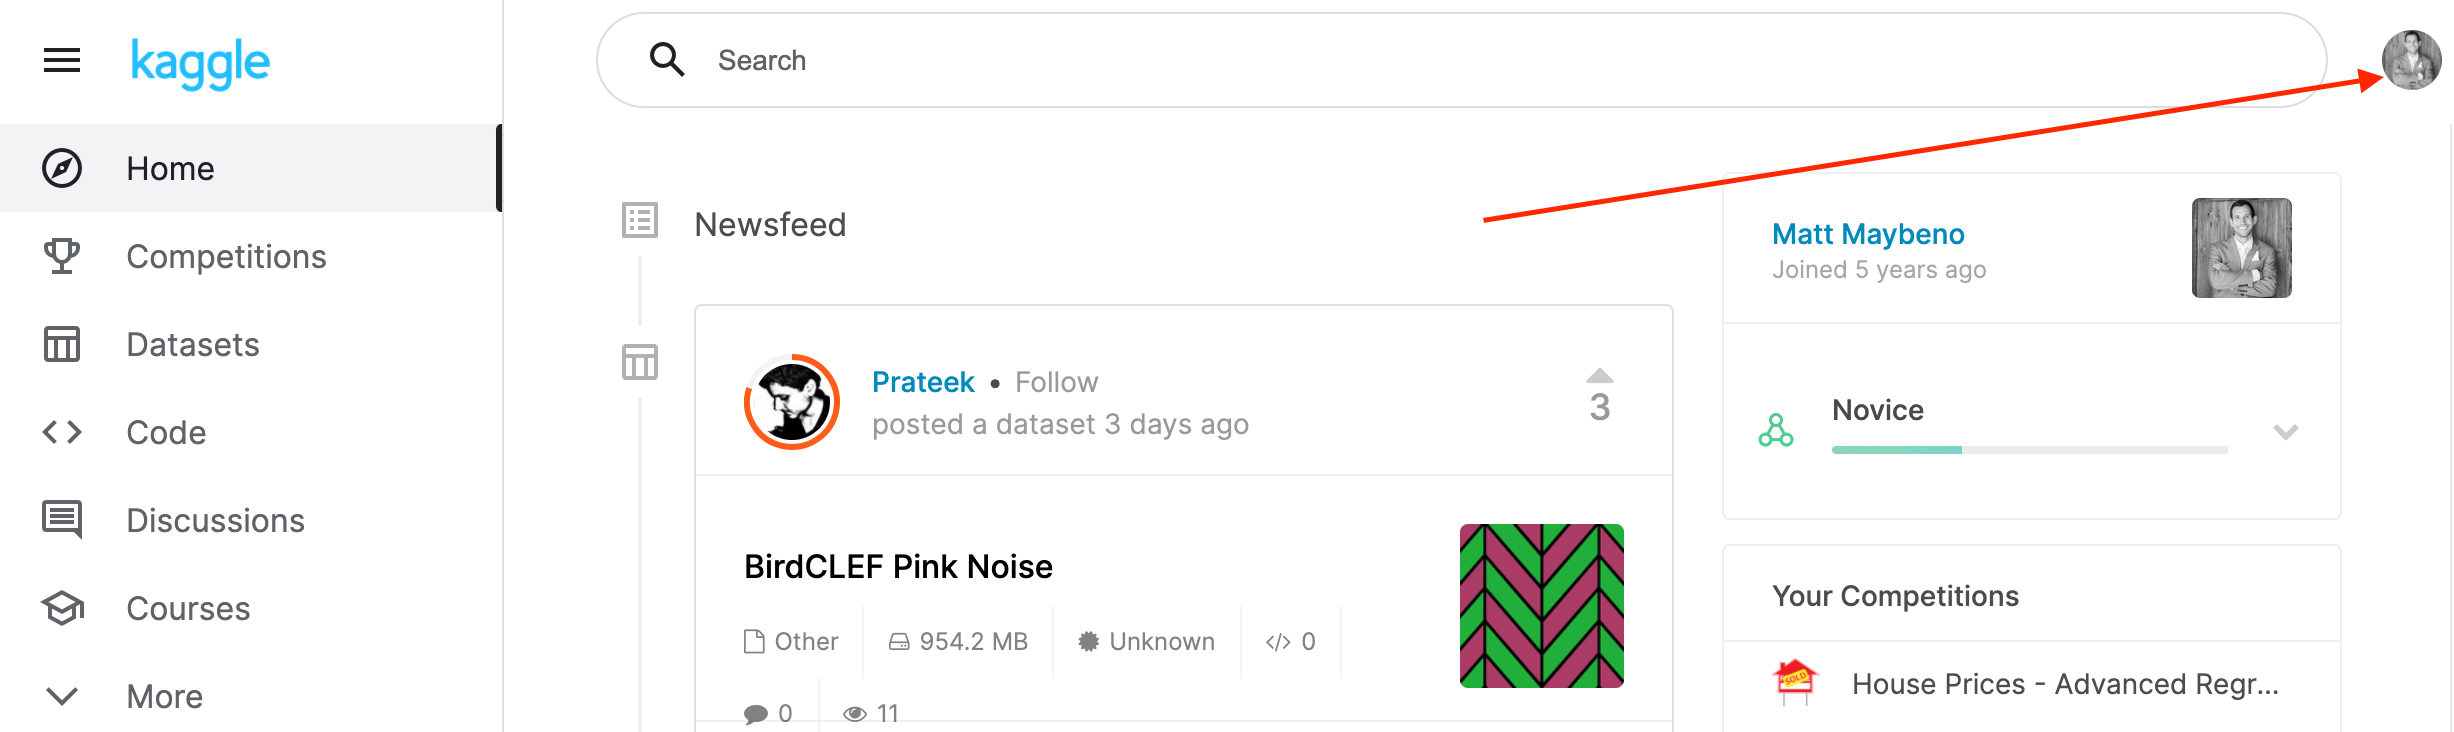
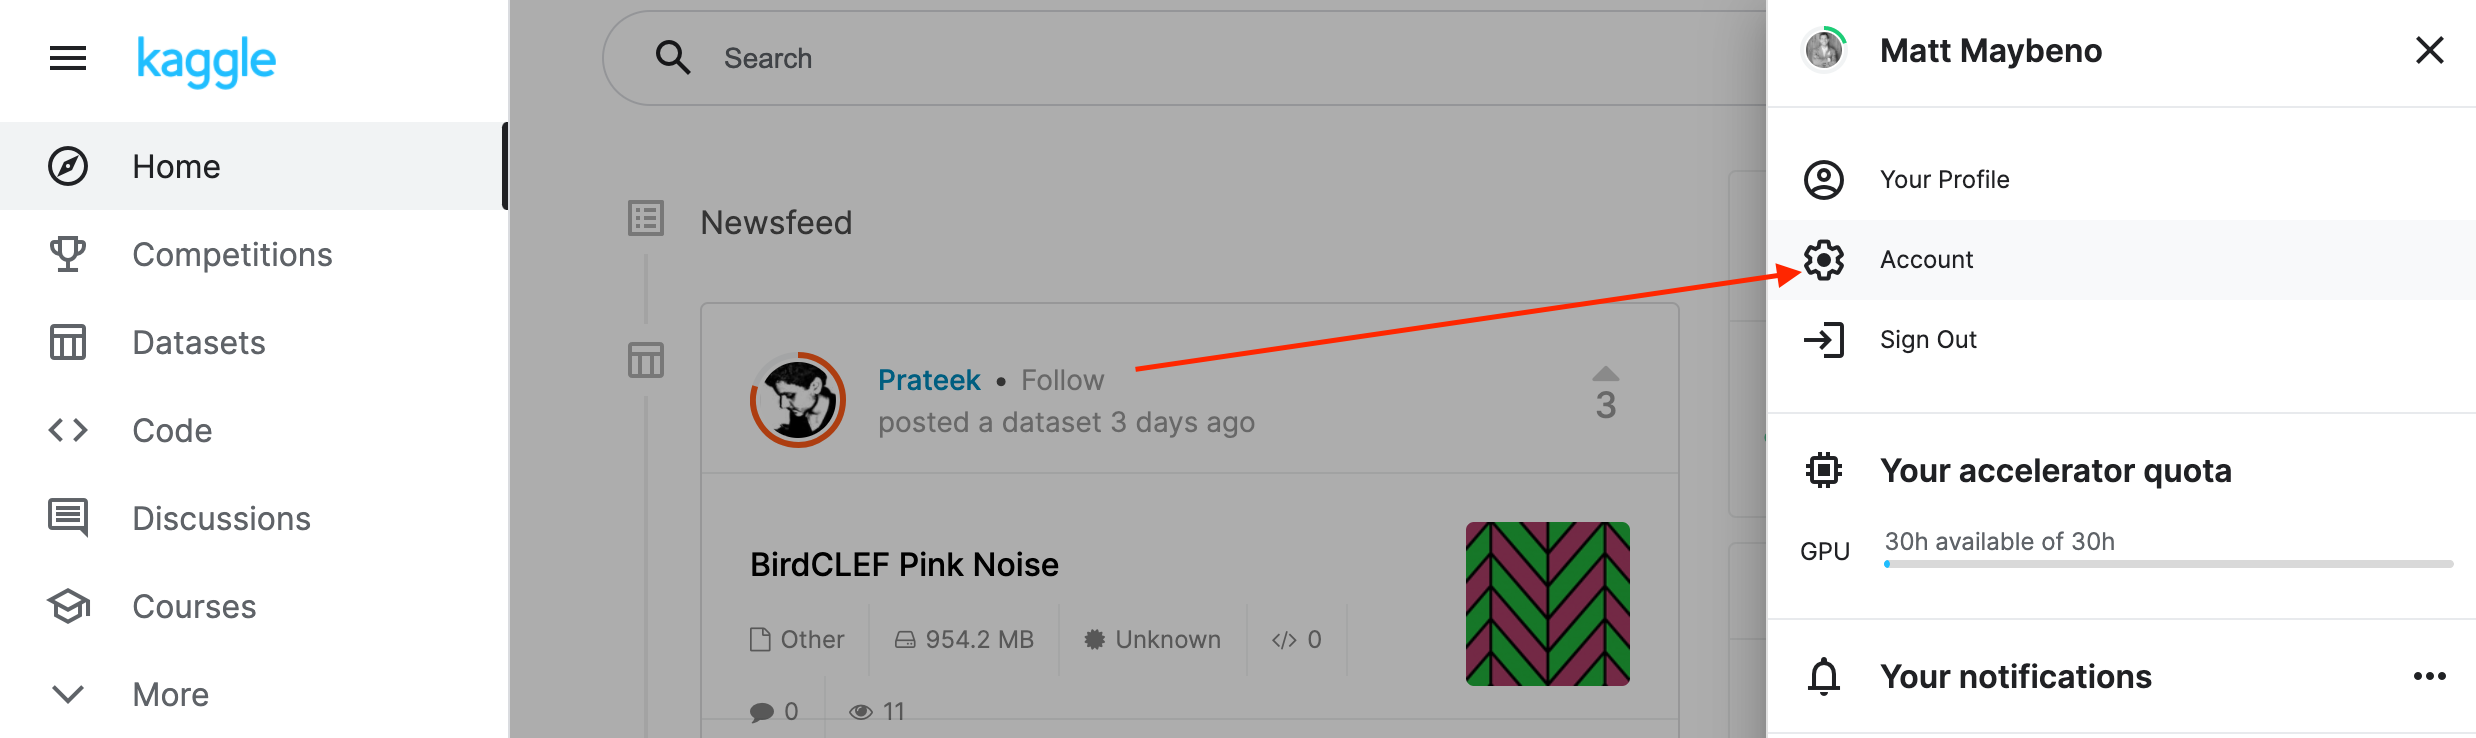
2. Scroll down to API and click Create New API Token.
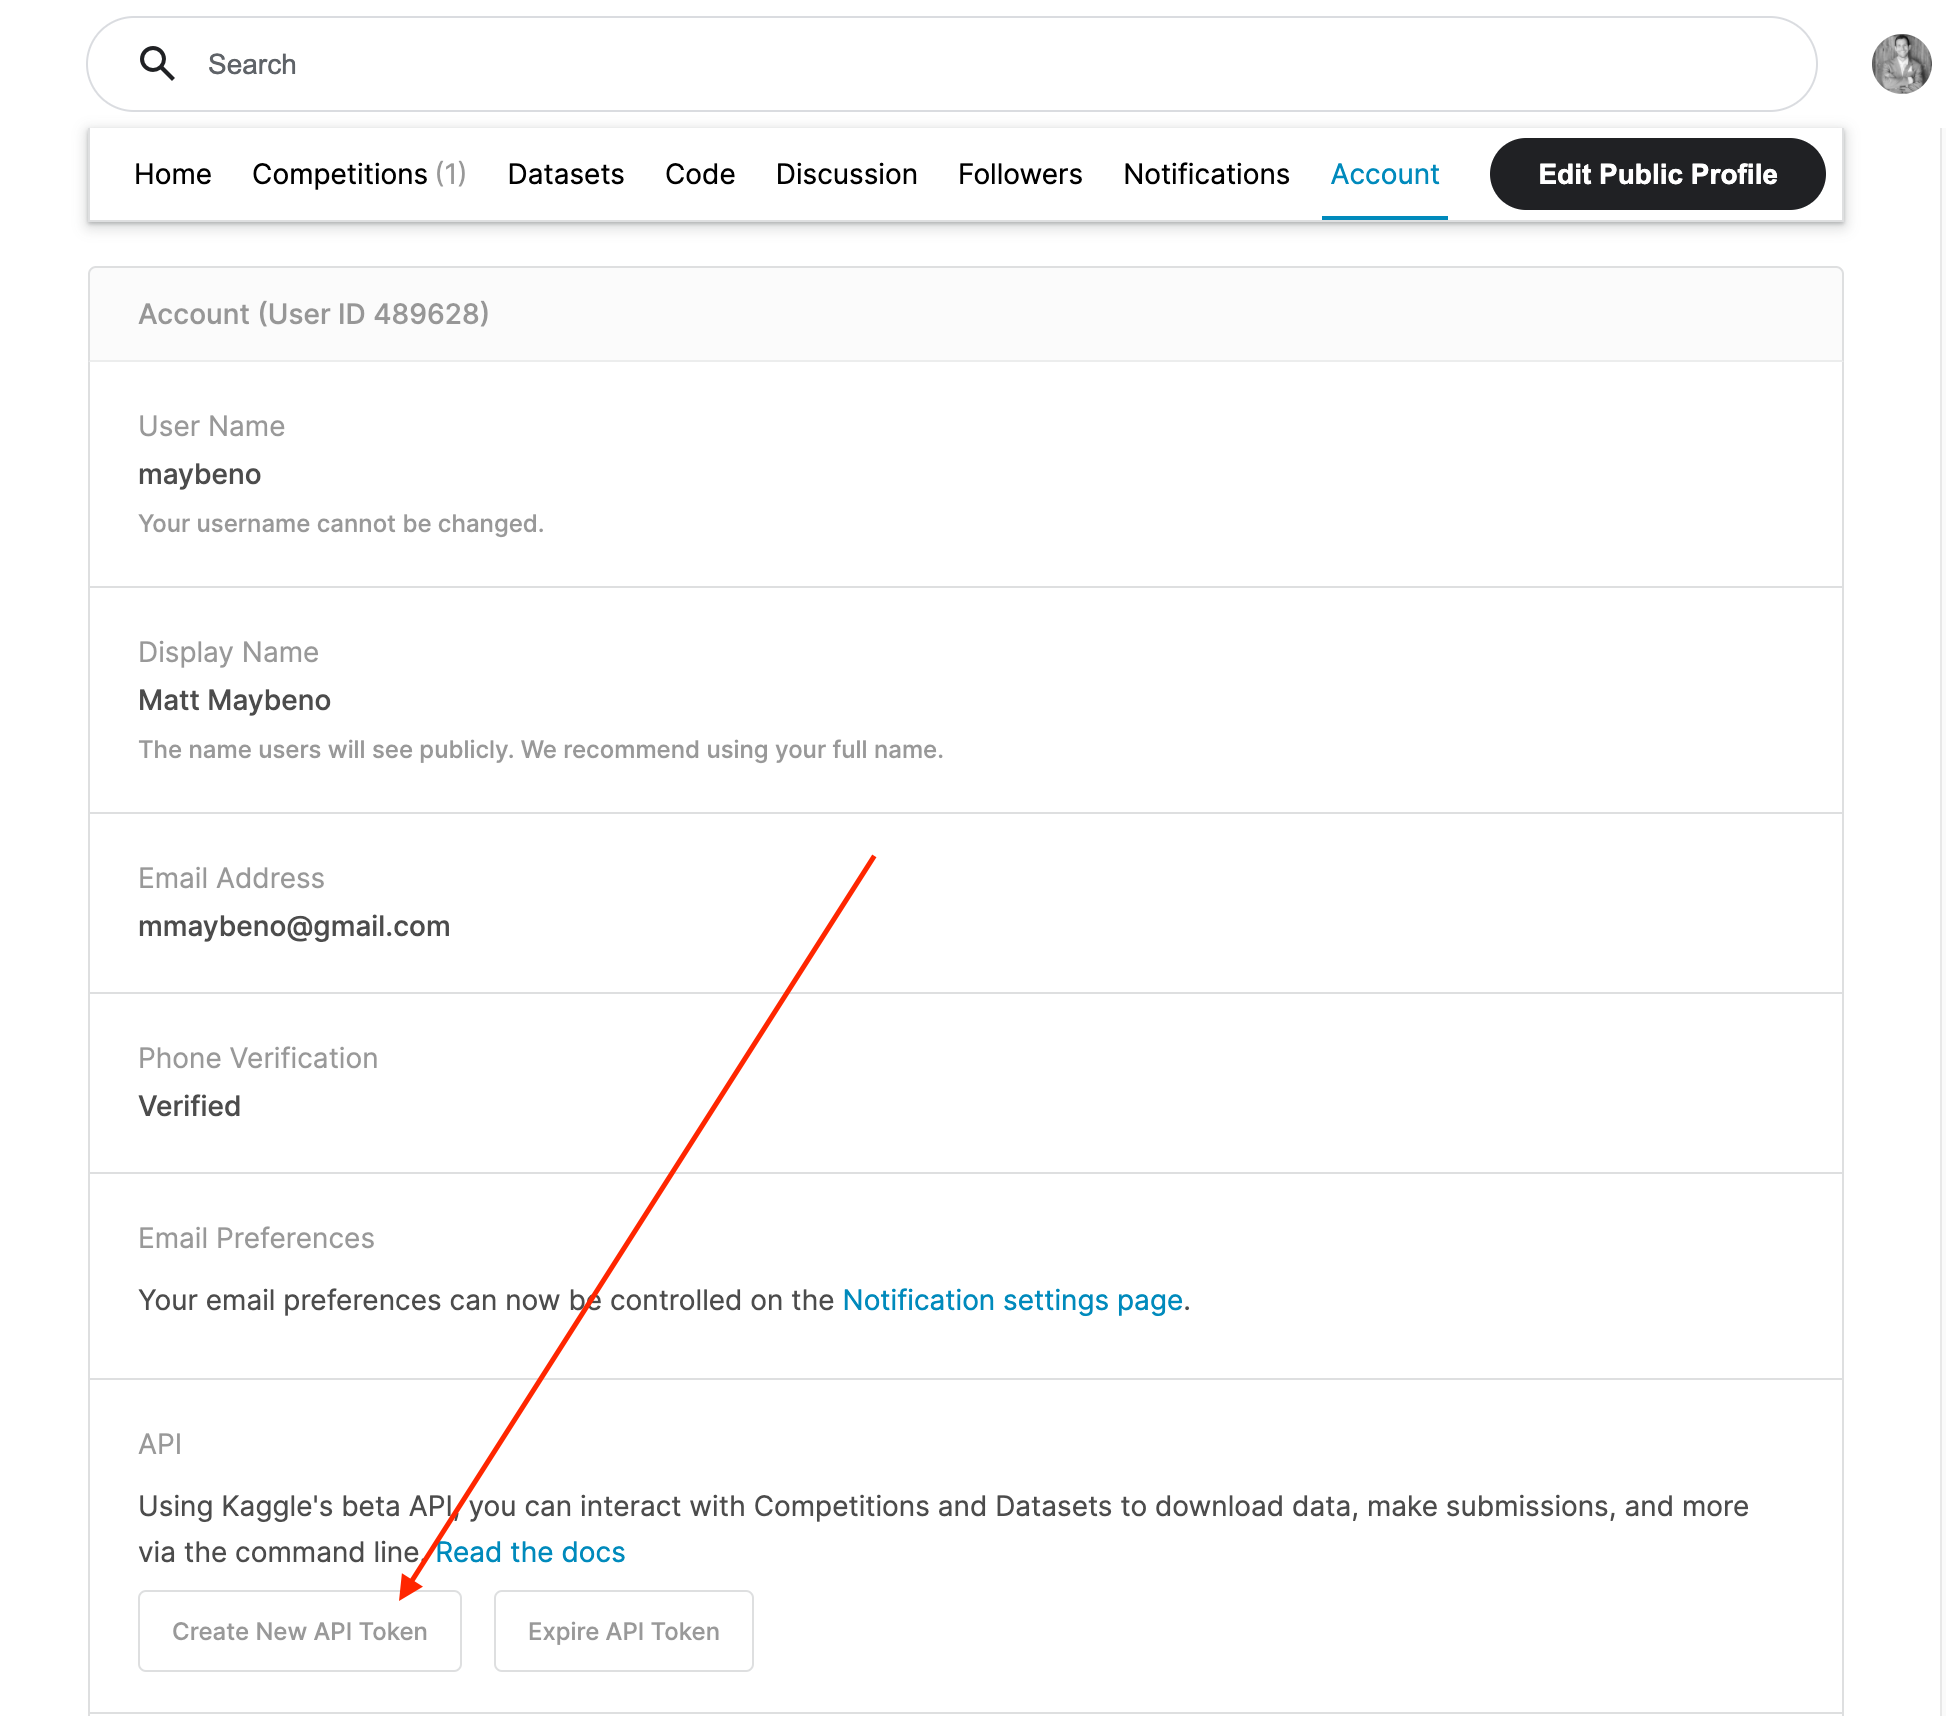
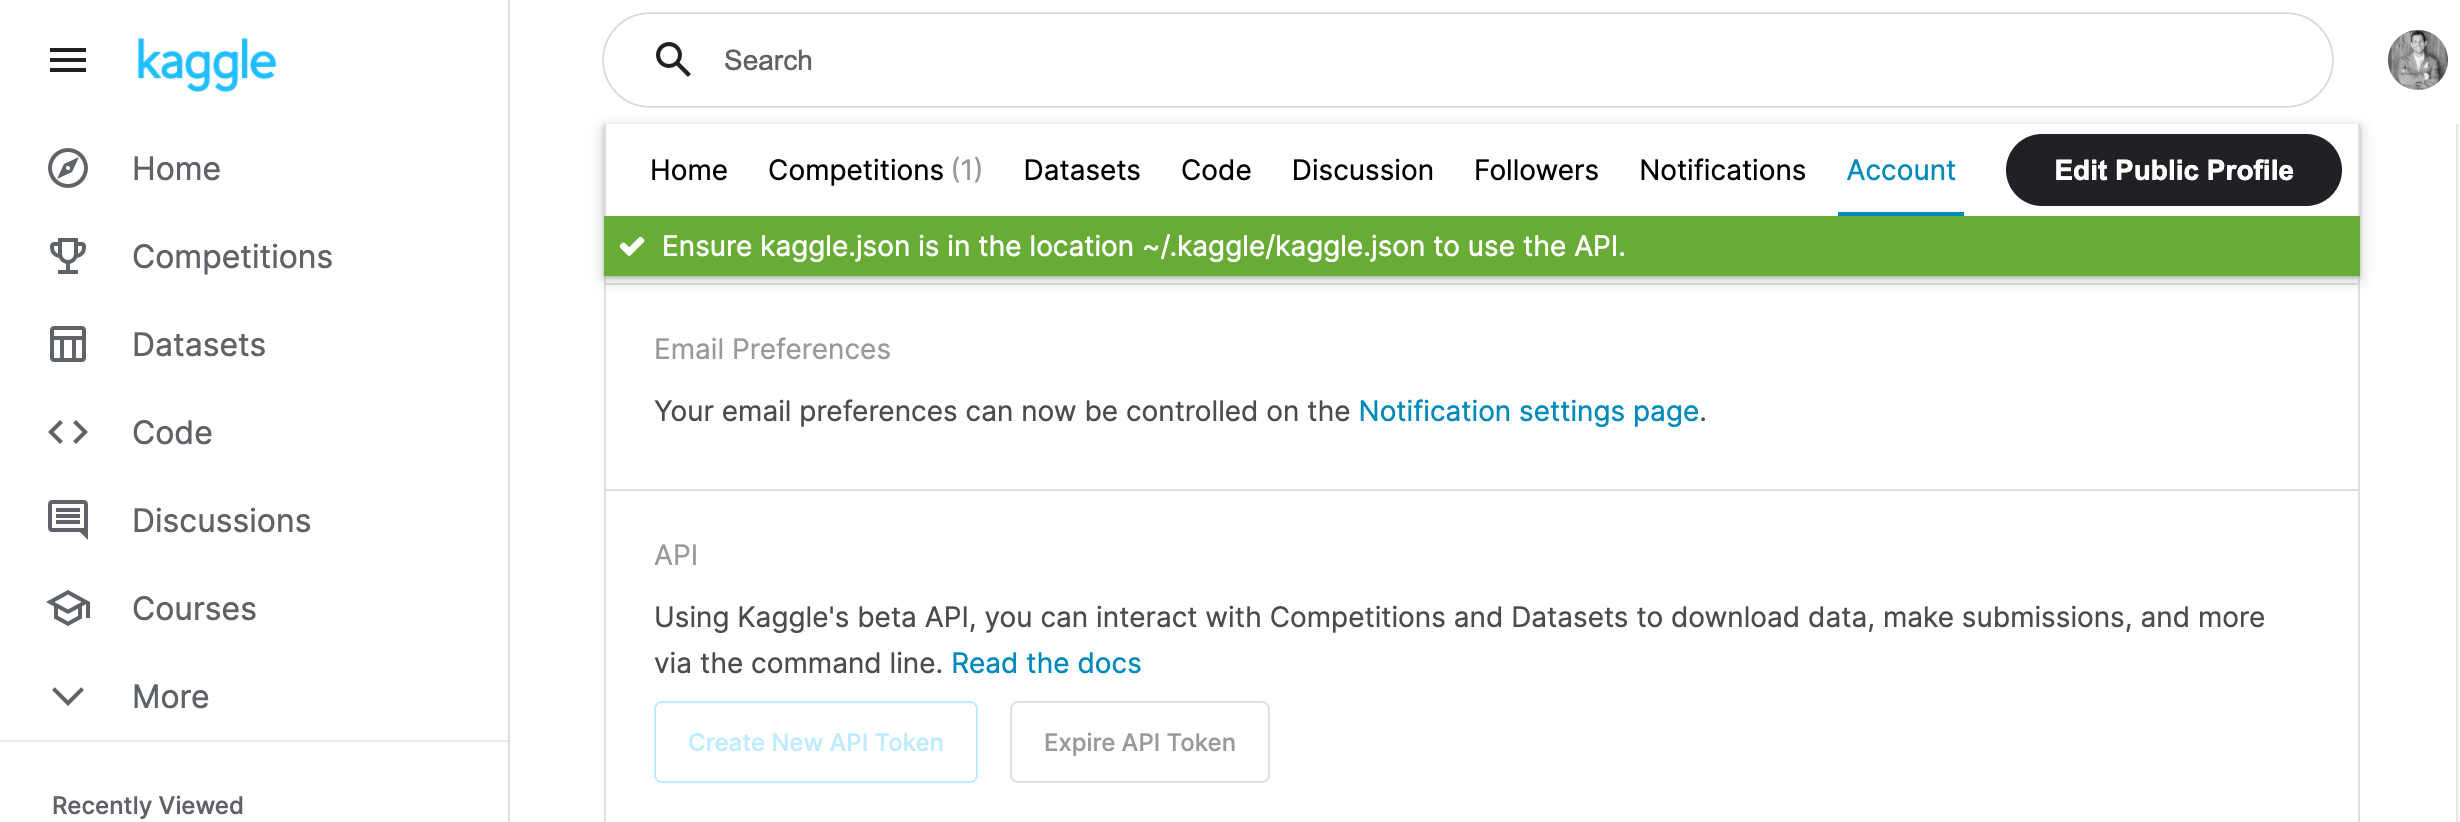
3. Open up `kaggle.json` and use the username and key.
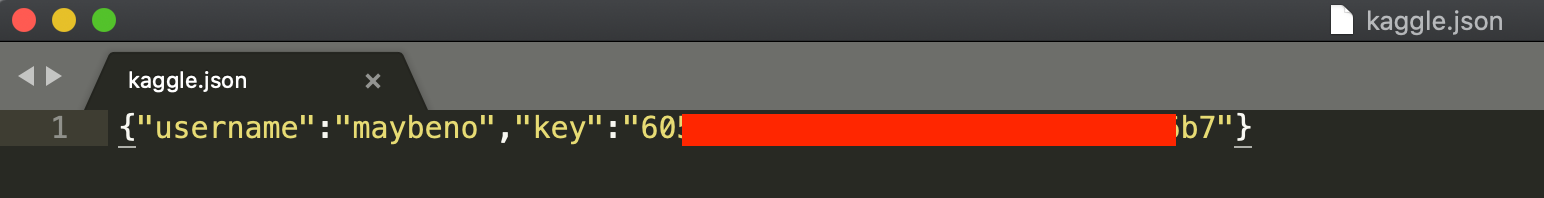

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [1]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

mkdir: /root: Read-only file system
touch: /root/.kaggle/kaggle.json: No such file or directory
chmod: /root/.kaggle/kaggle.json: No such file or directory


As you can see above - my root is read only as I a working on a work laptop

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "FILL_IN_USERNAME"
kaggle_key = "FILL_IN_KEY"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the [bike sharing demand competition](https://www.kaggle.com/c/bike-sharing-demand) and agree to the terms
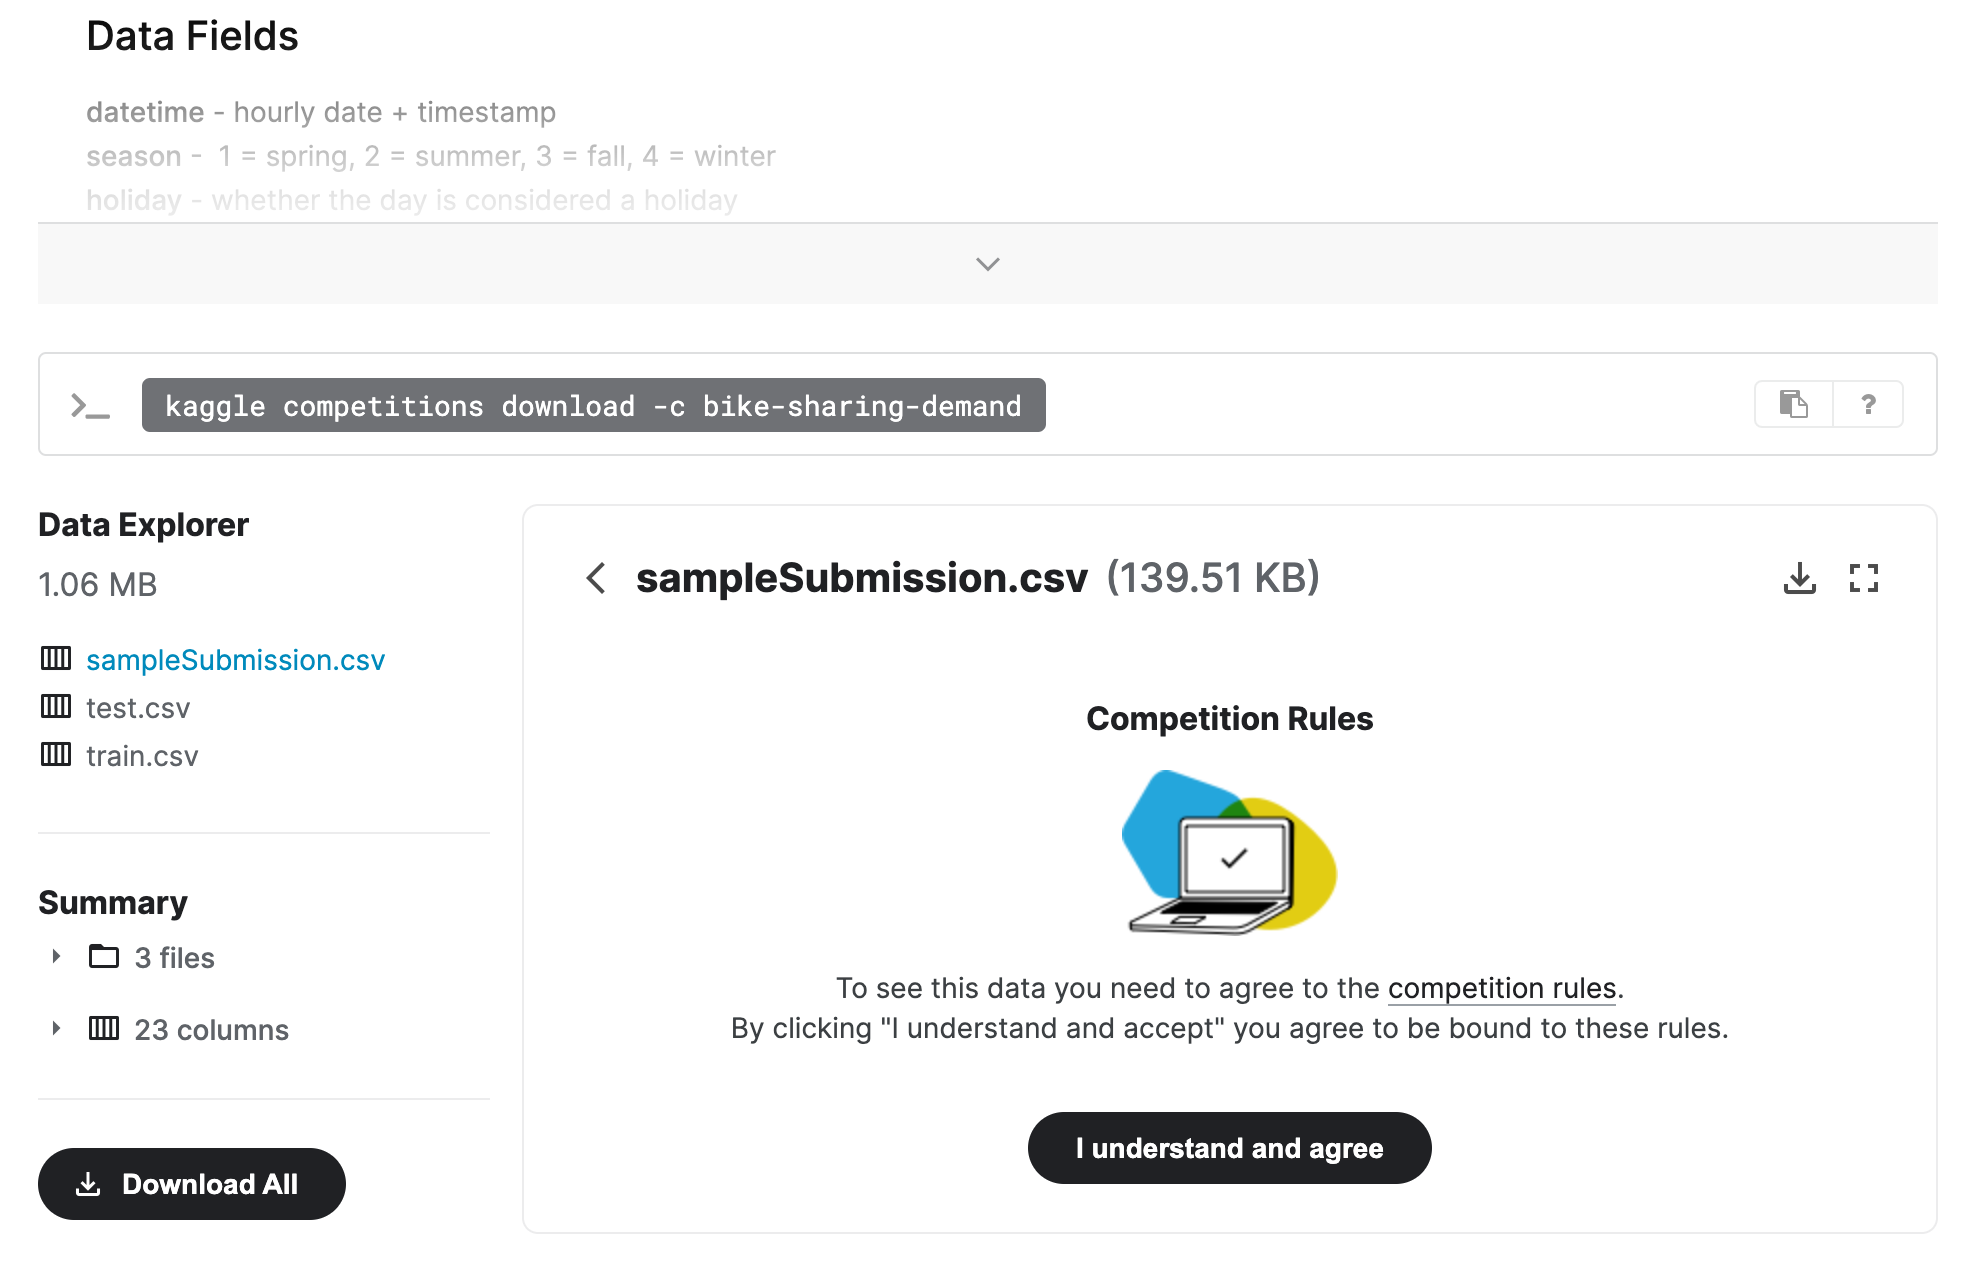

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

import autogluon

In [2]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('bike-sharing-demand/train.csv').drop(columns=['casual','registered'])
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  count  
0        81        0.0     16  
1        80        0.0     40  
2        80        0.0     32  
3        75        0.0     13  
4        75        0.0      1

In [3]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed         count  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean      23.655084     61.886460     12.799395    191.574132  
std        8.474601     19.245033      8.164537    181.144454  
min        0.760000      0.000000      0.000000      1.000000  
25%       16.665000     47.000000      7.001500     42.000000  
50%       24.240000     62.000000     12.998000    145.000000  
75%       31.060000     77.000000     16.997900    284.000000  
max       45.455000    100.000000     56.996900    977.000000

In [4]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('bike-sharing-demand/test.csv')
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [5]:
# Same thing as train and test dataset
submission = pd.read_csv('bike-sharing-demand/sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [38]:
%%time
predictor = TabularPredictor(label='count').fit(train_data=train,
                                            time_limit=600,
                                            presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220401_142635/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220401_142635/"
AutoGluon Version:  0.4.0
Python Version:     3.7.11
Operating System:   Darwin
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6231.84 MB
	Train Data (Original)  Memory Usage: 1.

[1000]	valid_set's rmse: 131.684
[2000]	valid_set's rmse: 130.67
[3000]	valid_set's rmse: 130.626
[1000]	valid_set's rmse: 135.592
[1000]	valid_set's rmse: 133.481
[2000]	valid_set's rmse: 132.323
[3000]	valid_set's rmse: 131.618
[4000]	valid_set's rmse: 131.443
[5000]	valid_set's rmse: 131.265
[6000]	valid_set's rmse: 131.277
[7000]	valid_set's rmse: 131.443
[1000]	valid_set's rmse: 128.503
[2000]	valid_set's rmse: 127.654
[3000]	valid_set's rmse: 127.227
[4000]	valid_set's rmse: 127.105
[1000]	valid_set's rmse: 134.135
[2000]	valid_set's rmse: 132.272
[3000]	valid_set's rmse: 131.286
[4000]	valid_set's rmse: 130.752
[5000]	valid_set's rmse: 130.363
[6000]	valid_set's rmse: 130.509
[1000]	valid_set's rmse: 136.168
[2000]	valid_set's rmse: 135.138
[3000]	valid_set's rmse: 135.029
[1000]	valid_set's rmse: 134.061
[2000]	valid_set's rmse: 133.034
[3000]	valid_set's rmse: 132.182
[4000]	valid_set's rmse: 131.997
[5000]	valid_set's rmse: 131.643
[6000]	valid_set's rmse: 131.504
[7000]	vali

	-131.4609	 = Validation score   (root_mean_squared_error)
	23.51s	 = Training   runtime
	0.66s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 373.57s of the 573.64s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 130.818
[1000]	valid_set's rmse: 133.204
[1000]	valid_set's rmse: 130.928
[1000]	valid_set's rmse: 126.846
[1000]	valid_set's rmse: 131.426
[1000]	valid_set's rmse: 133.655
[1000]	valid_set's rmse: 132.155
[1000]	valid_set's rmse: 130.62


	-131.0542	 = Validation score   (root_mean_squared_error)
	7.06s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 365.91s of the 565.97s of remaining time.
	-116.6217	 = Validation score   (root_mean_squared_error)
	2.13s	 = Training   runtime
	0.4s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 362.93s of the 563.0s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 8469.
	-130.4612	 = Validation score   (root_mean_squared_error)
	203.14s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 159.68s of the 359.75s of remaining time.
	-124.6372	 = Validation score   (root_mean_squared_error)
	1.12s	 = Training   runtime
	0.38s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 157.76s

[1000]	valid_set's rmse: 60.3134
[2000]	valid_set's rmse: 59.4888
[1000]	valid_set's rmse: 60.6085
[2000]	valid_set's rmse: 59.793
[1000]	valid_set's rmse: 63.0976
[2000]	valid_set's rmse: 62.0176
[1000]	valid_set's rmse: 64.9102
[2000]	valid_set's rmse: 63.0881
[3000]	valid_set's rmse: 63.2331
[1000]	valid_set's rmse: 57.7704
[2000]	valid_set's rmse: 56.7398
[1000]	valid_set's rmse: 62.6632
[2000]	valid_set's rmse: 62.0369
[1000]	valid_set's rmse: 62.2203
[2000]	valid_set's rmse: 61.2668
[1000]	valid_set's rmse: 58.5257


	-60.2691	 = Validation score   (root_mean_squared_error)
	15.02s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 183.48s of the 183.46s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-54.9037	 = Validation score   (root_mean_squared_error)
	4.51s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 178.8s of the 178.78s of remaining time.
	-53.3378	 = Validation score   (root_mean_squared_error)
	5.88s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 172.07s of the 172.05s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-55.3445	 = Validation score   (root_mean_squared_error)
	40.8s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... Trainin

CPU times: user 23min 44s, sys: 1min 5s, total: 24min 50s
Wall time: 10min


### Review AutoGluon's training run with ranking of models that did the best.

In [39]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -50.082320       3.382371  484.173741                0.000456           0.386664            3       True         22
1   NeuralNetFastAI_BAG_L2  -50.983240       2.472058  476.060783                0.227915          82.256011            2       True         18
2   RandomForestMSE_BAG_L2  -53.337840       2.675888  399.685822                0.431745           5.881051            2       True         15
3     ExtraTreesMSE_BAG_L2  -53.936948       2.722255  395.650014                0.478112           1.845243            2       True         17
4          LightGBM_BAG_L2  -54.903747       2.298769  398.316719                0.054626           4.511948            2       True         14
5           XGBoost_BAG_L2  -55.073222       2.286634  402.179717         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFa

### Create predictions from test dataset

In [40]:
predictions = predictor.predict(test)
predictions.head()

0    26.739716
1    40.376095
2    45.714859
3    49.119461
4    51.235603
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [41]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean       99.762779
std        87.836624
min        -1.735354
25%        22.437004
50%        68.314713
75%       165.213531
max       354.473633
Name: count, dtype: float64

In [42]:
# How many negative values do we have?
predictions.where(predictions.values <0).dropna()

211   -0.525363
212   -0.154420
213   -1.735354
214   -1.734224
215   -1.040829
216   -1.038325
217   -0.334664
Name: count, dtype: float32

In [43]:
# Set them to zero
predictions = predictions.apply(lambda x: np.array(x).clip(min=0))

### Set predictions to submission dataframe, save, and submit

In [44]:
submission["count"] = predictions
submission.to_csv("submission_no_features.csv", index=False)

In [28]:
# I work on a work laptop and have no permissions to save json to root directory so all submissions were
# done on the website
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

Traceback (most recent call last):
  File "/Users/saho/opt/anaconda3/envs/bike_share/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/saho/opt/anaconda3/envs/bike_share/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/Users/saho/opt/anaconda3/envs/bike_share/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /Users/saho/.kaggle. Or use the environment method.


#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [70]:
# I work on a work laptop and have no permissions to save json to root directory so all submissions were
# done on the website
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

Traceback (most recent call last):
  File "/Users/saho/opt/anaconda3/envs/bike_share/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/Users/saho/opt/anaconda3/envs/bike_share/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/Users/saho/opt/anaconda3/envs/bike_share/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /Users/saho/.kaggle. Or use the environment method.


#### Initial score of `1.85306`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

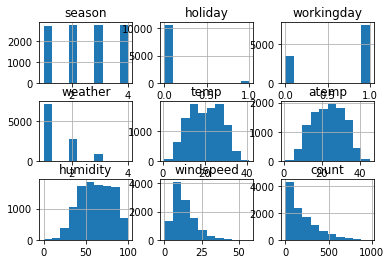

In [45]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [9]:
# convert date column to date time format so we can parse date
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [10]:
# create a new feature
train['year'] = train['datetime'].apply(lambda x: x.year)
test['year'] = test['datetime'].apply(lambda x: x.year)


train['month'] = train['datetime'].apply(lambda x: x.month)
test['month'] = test['datetime'].apply(lambda x: x.month)


train['day'] = train['datetime'].apply(lambda x: x.day)
test['day'] = test['datetime'].apply(lambda x: x.day)

train['hour'] = train['datetime'].apply(lambda x: x.hour)
test['hour'] = test['datetime'].apply(lambda x: x.hour)


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [11]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [11]:
# View our new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  count  year  month  day  hour  
0        81        0.0     16  2011      1    1     0  
1        80        0.0     40  2011      1    1     1  
2        80        0.0     32  2011      1    1     2  
3        75        0.0     13  2011      1    1     3  
4        75        0.0      1  2011      1    1     4

array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'hour'}>]], dtype=object)

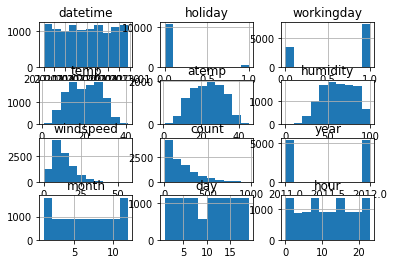

In [50]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [51]:
%%time
predictor_new_features = TabularPredictor(label='count').fit(train_data=train,
                                            time_limit=600,
                                            presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220401_143648/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220401_143648/"
AutoGluon Version:  0.4.0
Python Version:     3.7.11
Operating System:   Darwin
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    5898.84 MB
	Train Data (Original)  Memory Usage: 0

[1000]	valid_set's rmse: 35.1395
[2000]	valid_set's rmse: 33.4443
[3000]	valid_set's rmse: 33.2224
[4000]	valid_set's rmse: 33.1502
[5000]	valid_set's rmse: 33.1935
[1000]	valid_set's rmse: 36.5025
[2000]	valid_set's rmse: 34.5423
[3000]	valid_set's rmse: 34.1505
[4000]	valid_set's rmse: 33.9807
[5000]	valid_set's rmse: 33.9578
[1000]	valid_set's rmse: 35.9928
[2000]	valid_set's rmse: 34.2255
[3000]	valid_set's rmse: 33.6889
[4000]	valid_set's rmse: 33.4699
[5000]	valid_set's rmse: 33.3243
[6000]	valid_set's rmse: 33.268
[7000]	valid_set's rmse: 33.2083
[8000]	valid_set's rmse: 33.2182
[9000]	valid_set's rmse: 33.2138
[1000]	valid_set's rmse: 37.8288
[2000]	valid_set's rmse: 36.2891
[3000]	valid_set's rmse: 35.978
[4000]	valid_set's rmse: 35.8689
[5000]	valid_set's rmse: 35.8846
[1000]	valid_set's rmse: 39.2166
[2000]	valid_set's rmse: 37.1437
[3000]	valid_set's rmse: 36.7029
[4000]	valid_set's rmse: 36.649
[5000]	valid_set's rmse: 36.6295
[1000]	valid_set's rmse: 35.6761
[2000]	valid_

	-34.346	 = Validation score   (root_mean_squared_error)
	31.92s	 = Training   runtime
	0.72s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 364.54s of the 564.59s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 33.1713
[2000]	valid_set's rmse: 33.0077
[1000]	valid_set's rmse: 32.8635
[2000]	valid_set's rmse: 32.6404
[1000]	valid_set's rmse: 31.9543
[2000]	valid_set's rmse: 31.343
[3000]	valid_set's rmse: 30.9039
[4000]	valid_set's rmse: 30.8612
[1000]	valid_set's rmse: 35.8483
[2000]	valid_set's rmse: 35.4773
[3000]	valid_set's rmse: 35.3993
[1000]	valid_set's rmse: 35.5388
[1000]	valid_set's rmse: 31.6283
[1000]	valid_set's rmse: 37.9327
[2000]	valid_set's rmse: 37.4577
[1000]	valid_set's rmse: 34.9434
[2000]	valid_set's rmse: 34.6719


	-33.9173	 = Validation score   (root_mean_squared_error)
	13.71s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 349.74s of the 549.79s of remaining time.
	-38.3578	 = Validation score   (root_mean_squared_error)
	2.63s	 = Training   runtime
	0.45s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 346.25s of the 546.3s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 5738.
	Ran out of time, early stopping on iteration 5927.
	Ran out of time, early stopping on iteration 6170.
	Ran out of time, early stopping on iteration 6200.
	Ran out of time, early stopping on iteration 6333.
	Ran out of time, early stopping on iteration 6612.
	Ran out of time, early stopping on iteration 7096.
	Ran out of time, early stopping on iteration 7762.
	-33.3524	 = Validation score   (root_mean_squared_er

[1000]	valid_set's rmse: 34.8621
[1000]	valid_set's rmse: 29.7564
[1000]	valid_set's rmse: 30.6673


	-31.2715	 = Validation score   (root_mean_squared_error)
	7.26s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 192.02s of the 192.01s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 31.0707


	-30.454	 = Validation score   (root_mean_squared_error)
	5.49s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 186.3s of the 186.29s of remaining time.
	-31.5313	 = Validation score   (root_mean_squared_error)
	6.34s	 = Training   runtime
	0.51s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 178.84s of the 178.82s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-30.4131	 = Validation score   (root_mean_squared_error)
	62.33s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... Training model for up to 116.4s of the 116.39s of remaining time.
	-31.3642	 = Validation score   (root_mean_squared_error)
	1.86s	 = Training   runtime
	0.46s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L2 ... Training model for up to 113.67s of the 113.66s of remaining time.
	Fitting 8 child models

CPU times: user 29min 51s, sys: 54.6 s, total: 30min 45s
Wall time: 9min 59s


In [52]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.313835       2.834204  547.701941                0.000501           0.356613            3       True         18
1   NeuralNetFastAI_BAG_L2  -29.587140       2.640517  471.536646                0.226674          79.394585            2       True         15
2          CatBoost_BAG_L2  -30.413103       2.461370  454.472600                0.047527          62.330538            2       True         13
3          LightGBM_BAG_L2  -30.454012       2.489937  397.634877                0.076094           5.492815            2       True         11
4           XGBoost_BAG_L2  -30.566856       2.483407  400.127391                0.069564           7.985329            2       True         16
5        LightGBMXT_BAG_L2  -31.271497       2.532743  399.403208         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsemb

In [53]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
# predictions_new_features = predictions_new_features.where(predictions_new_features.values <0).dropna()
predictions_new_features = predictions_new_features.apply(lambda x: np.array(x).clip(min=0))

In [54]:
predictions_new_features

0        14.919042
1         8.825162
2         8.423960
3         8.735602
4         8.823152
           ...    
6488    269.695770
6489    211.033798
6490    158.170288
6491    114.352295
6492     82.353851
Name: count, Length: 6493, dtype: float64

In [55]:
submission_new_features = pd.read_csv('bike-sharing-demand/sampleSubmission.csv')

In [56]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
# I work on a work laptop and have no permissions to save json to root directory so all submissions were
# done on the website and not using the code below


# !kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"
# !kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.74591`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [52]:
hyperparameters = {'NN': {'num_epochs': 5}, 'GBM': {'num_boost_round': 30}, 'XGB':{'max_depth':3}}

In [53]:
predictor_new_hpo = TabularPredictor(label='count').fit(train_data=train, 
                                                 time_limit=600, presets="best_quality",
                                                        hyperparameters=hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20220401_161520/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220401_161520/"
AutoGluon Version:  0.4.0
Python Version:     3.7.11
Operating System:   Darwin
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6221.07 MB
	Train Data (Original)  Memory Usage: 0

	1.81s	 = Validation runtime
Repeating k-fold bagging: 2/20
Fitting model: LightGBM_BAG_L2 ... Training model for up to 205.39s of the 205.38s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with SequentialLocalFoldFittingStrategy
	-52.05	 = Validation score   (root_mean_squared_error)
	3.51s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: XGBoost_BAG_L2 ... Training model for up to 203.54s of the 203.53s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with SequentialLocalFoldFittingStrategy
	-34.9874	 = Validation score   (root_mean_squared_error)
	6.65s	 = Training   runtime
	0.14s	 = Validation runtime
Fitting model: NeuralNetMXNet_BAG_L2 ... Training model for up to 200.13s of the 200.12s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with SequentialLocalFoldFittingStrategy
	-92.0949	 = Validation score   (root_mean_squared_error)
	53.54s	 = Training   runtime
	3.64s	 = Validation runtime
Repeating k-fold b

In [54]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3  -34.767351      19.843176  532.907516                0.000487           0.155106            3       True          8
1         XGBoost_BAG_L2  -34.768740       8.887749  370.126898                0.422407          20.401735            2       True          6
2    WeightedEnsemble_L2  -36.457861       1.293670  240.904667                0.000435           0.152501            2       True          4
3         XGBoost_BAG_L1  -36.701641       1.137856  233.867603                1.137856         233.867603            1       True          2
4        LightGBM_BAG_L2  -51.999226       8.698473  360.308793                0.233132          10.583630            2       True          5
5        LightGBM_BAG_L1  -72.440563       0.155379    6.884563                0.15537

{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetMxnet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetMxnet',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -72.44056300875371,
  'XGBoost_BAG_L1': -36.70164113747882,
  'NeuralNetMXNet_BAG_L1': -174.4798391007569,
  'WeightedEnsemble_L2': -36.4578613497465,
  'LightGBM_BAG_L2': -51.99922562039634,
  'XGBoost_BAG_L2': -34.76873992028658,
  'NeuralNetMXNet_BAG_L2': -91.36692644159668,
  'WeightedEnsemble_L3': -34.76735112159422},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1': 'AutogluonModels/ag-20220401_161520/models/LightGBM_BAG_L1/',
  'XGBoost_BAG_L1': 'AutogluonMod

In [15]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
# predictions_new_features = predictions_new_features.where(predictions_new_features.values <0).dropna()
predictions_new_hpo = predictions_new_hpo.apply(lambda x: np.array(x).clip(min=0))

In [16]:
submission_new_hpo = pd.read_csv('bike-sharing-demand/sampleSubmission.csv')

In [17]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

#### New Score of `0.52941`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

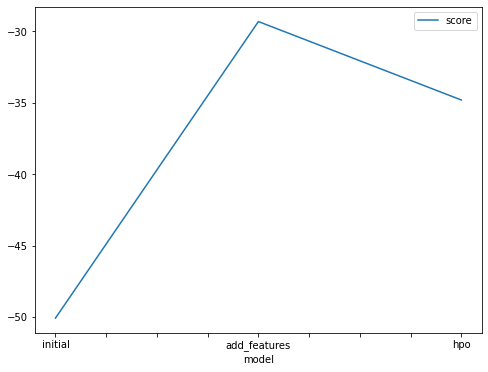

In [20]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-50.082320 , -29.313835 , -34.807948]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

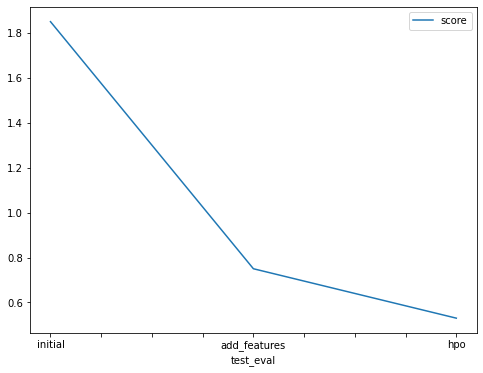

In [19]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.85, 0.75, 0.53]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
hyperparameters = {'NN': {'num_epochs': 5}, 'GBM': {'num_boost_round': 30}, 'XGB':{'max_depth':3}}

In [36]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial_model", "add_features_model", "hpo_model"],
    "hpo1": [np.nan, np.nan, "NN: {num_epochs: 5}"],
    "hpo2": [np.nan, np.nan, "GBM: {num_boost_round: 30}"],
    "hpo3": [np.nan, np.nan, "XGB':{max_depth:3}"],
    "score": [1.85, 0.75, 0.53]
})

model                 hpo1                        hpo2  \
0       initial_model                  NaN                         NaN   
1  add_features_model                  NaN                         NaN   
2           hpo_model  NN: {num_epochs: 5}  GBM: {num_boost_round: 30}   

                 hpo3  score  
0                 NaN   1.85  
1                 NaN   0.75  
2  XGB':{max_depth:3}   0.53

## Extra EDA

In [38]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [30]:
import seaborn as sns
import plotly.express as px


import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

# Extra EDA

<AxesSubplot:>

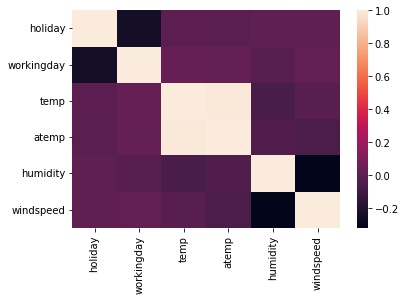

In [41]:
sns.heatmap(train_features.corr())

We can see two peaks in typical usage - around 8am and then even stronger at at around 5pm / 6pm (rush hours)

In [31]:
fig = px.bar(train.groupby(['hour'])['count'].mean(),title='Average number of bike shares by hour of day')
fig.show()

Between january and june, demand increases month on month and peaks for the summer months and tails off from October

In [25]:
df_summary = pd.concat([train.groupby('month')['temp'].mean(),\
                        train.groupby(['month'])['count'].mean()],axis=1)
df_summary.columns = ['average_temp','total_shares']

Bike shares peak in the summer months when it is the warmest time of the year

In [32]:
fig_bar = px.bar(df_summary,color='average_temp',title='Average number of bike shares by month, hue denotes average monthly temperature')
fig_bar.show()